# Flagship vs Pancan Comparison

This notebooks compares the mutation type abundance for EGFR between the flagship and harmonized pancan pipelines. 

# Part 1: EGFR mutation status

# Step 1: Flagship EGFR mutation status

Make a figure which shows the mutation type abundance for EGFR across the different cancers. 

First import cptac and load datasets

In [4]:
import cptac
import cptac.pancan as pc
cptac.version() 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plot_utils as p

In [3]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()
ls = cptac.Lscc()

Second, call get_geneotype_all_vars for EGFR for each cancer type. This returns a df with mutation, location, and mutation_status. For individuals with multiple mutations, we report a single mutation type based on the following priority: deletion, truncation, missense, amplification, inframe, silent, and wildtype.

In [5]:
gene = 'PTEN'

In [6]:
endo = en.get_genotype_all_vars(gene)
gbm = g.get_genotype_all_vars(gene)
hnscc = hn.get_genotype_all_vars(gene)
ovar = o.get_genotype_all_vars(gene)
cc = c.get_genotype_all_vars(gene)
colon = col.get_genotype_all_vars(gene)
ld = l.get_genotype_all_vars(gene)
brca = b.get_genotype_all_vars(gene)
lscc = ls.get_genotype_all_vars(gene)

In [37]:
#example 
gbm.head()

Name,Mutation,Location,Mutation_Status
Patient_ID,,,
C3L-00104,Amplification,Amplification,Single_mutation
C3L-00365,Missense_Mutation,p.G665D,Multiple_mutation
C3L-00674,Amplification,Amplification,Single_mutation
C3L-00677,Amplification,Amplification,Single_mutation
C3L-01040,Amplification,Amplification,Single_mutation


# Step 2: Match Mutation Labels

Change labels to match desired final figure and have nameing be more consistent across cancer type.

In [13]:
colon["Mutation"] = colon['Mutation'].replace(['nonsynonymous SNV'], 'Missense')
colon["Mutation"] = colon['Mutation'].replace(['nonframeshift insertion'], 'In_Frame_Ins')
colon["Mutation"] = colon['Mutation'].replace(['frameshift deletion'], 'Frame_Shift_Del')

colon.Mutation.value_counts()

Wildtype         76
Deletion         25
Missense          3
Amplification     1
Truncation        1
Name: Mutation, dtype: int64

In [14]:
# Simplify mutation names, create truncation and indel groups
dfs = [endo, gbm, hnscc, cc, ovar, ld, brca, lscc, colon]
for df in dfs:
    df['Mutation'].where(df['Mutation'] != 'Missense_Mutation', 'Missense', inplace = True) # replace when false
    df['Mutation'].where(df['Mutation'] != 'Wildtype_Tumor', 'Wildtype', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'In_Frame_Del', 'Indel', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'In_Frame_Ins', 'Indel', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'Nonsense_Mutation', 'Truncation', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'Frame_Shift_Del', 'Truncation', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'Frame_Shift_Ins', 'Truncation', inplace = True)

In [15]:
ld["Mutation"] = ld['Mutation'].replace(['No_Mutation'], 'Wildtype')
colon["Mutation"] = colon['Mutation'].replace(['No_Mutation'], 'Wildtype')

# Step 3: Create figure

Put dfs into a list. Create list of names for figure legend. 
Call plot_mutations function.

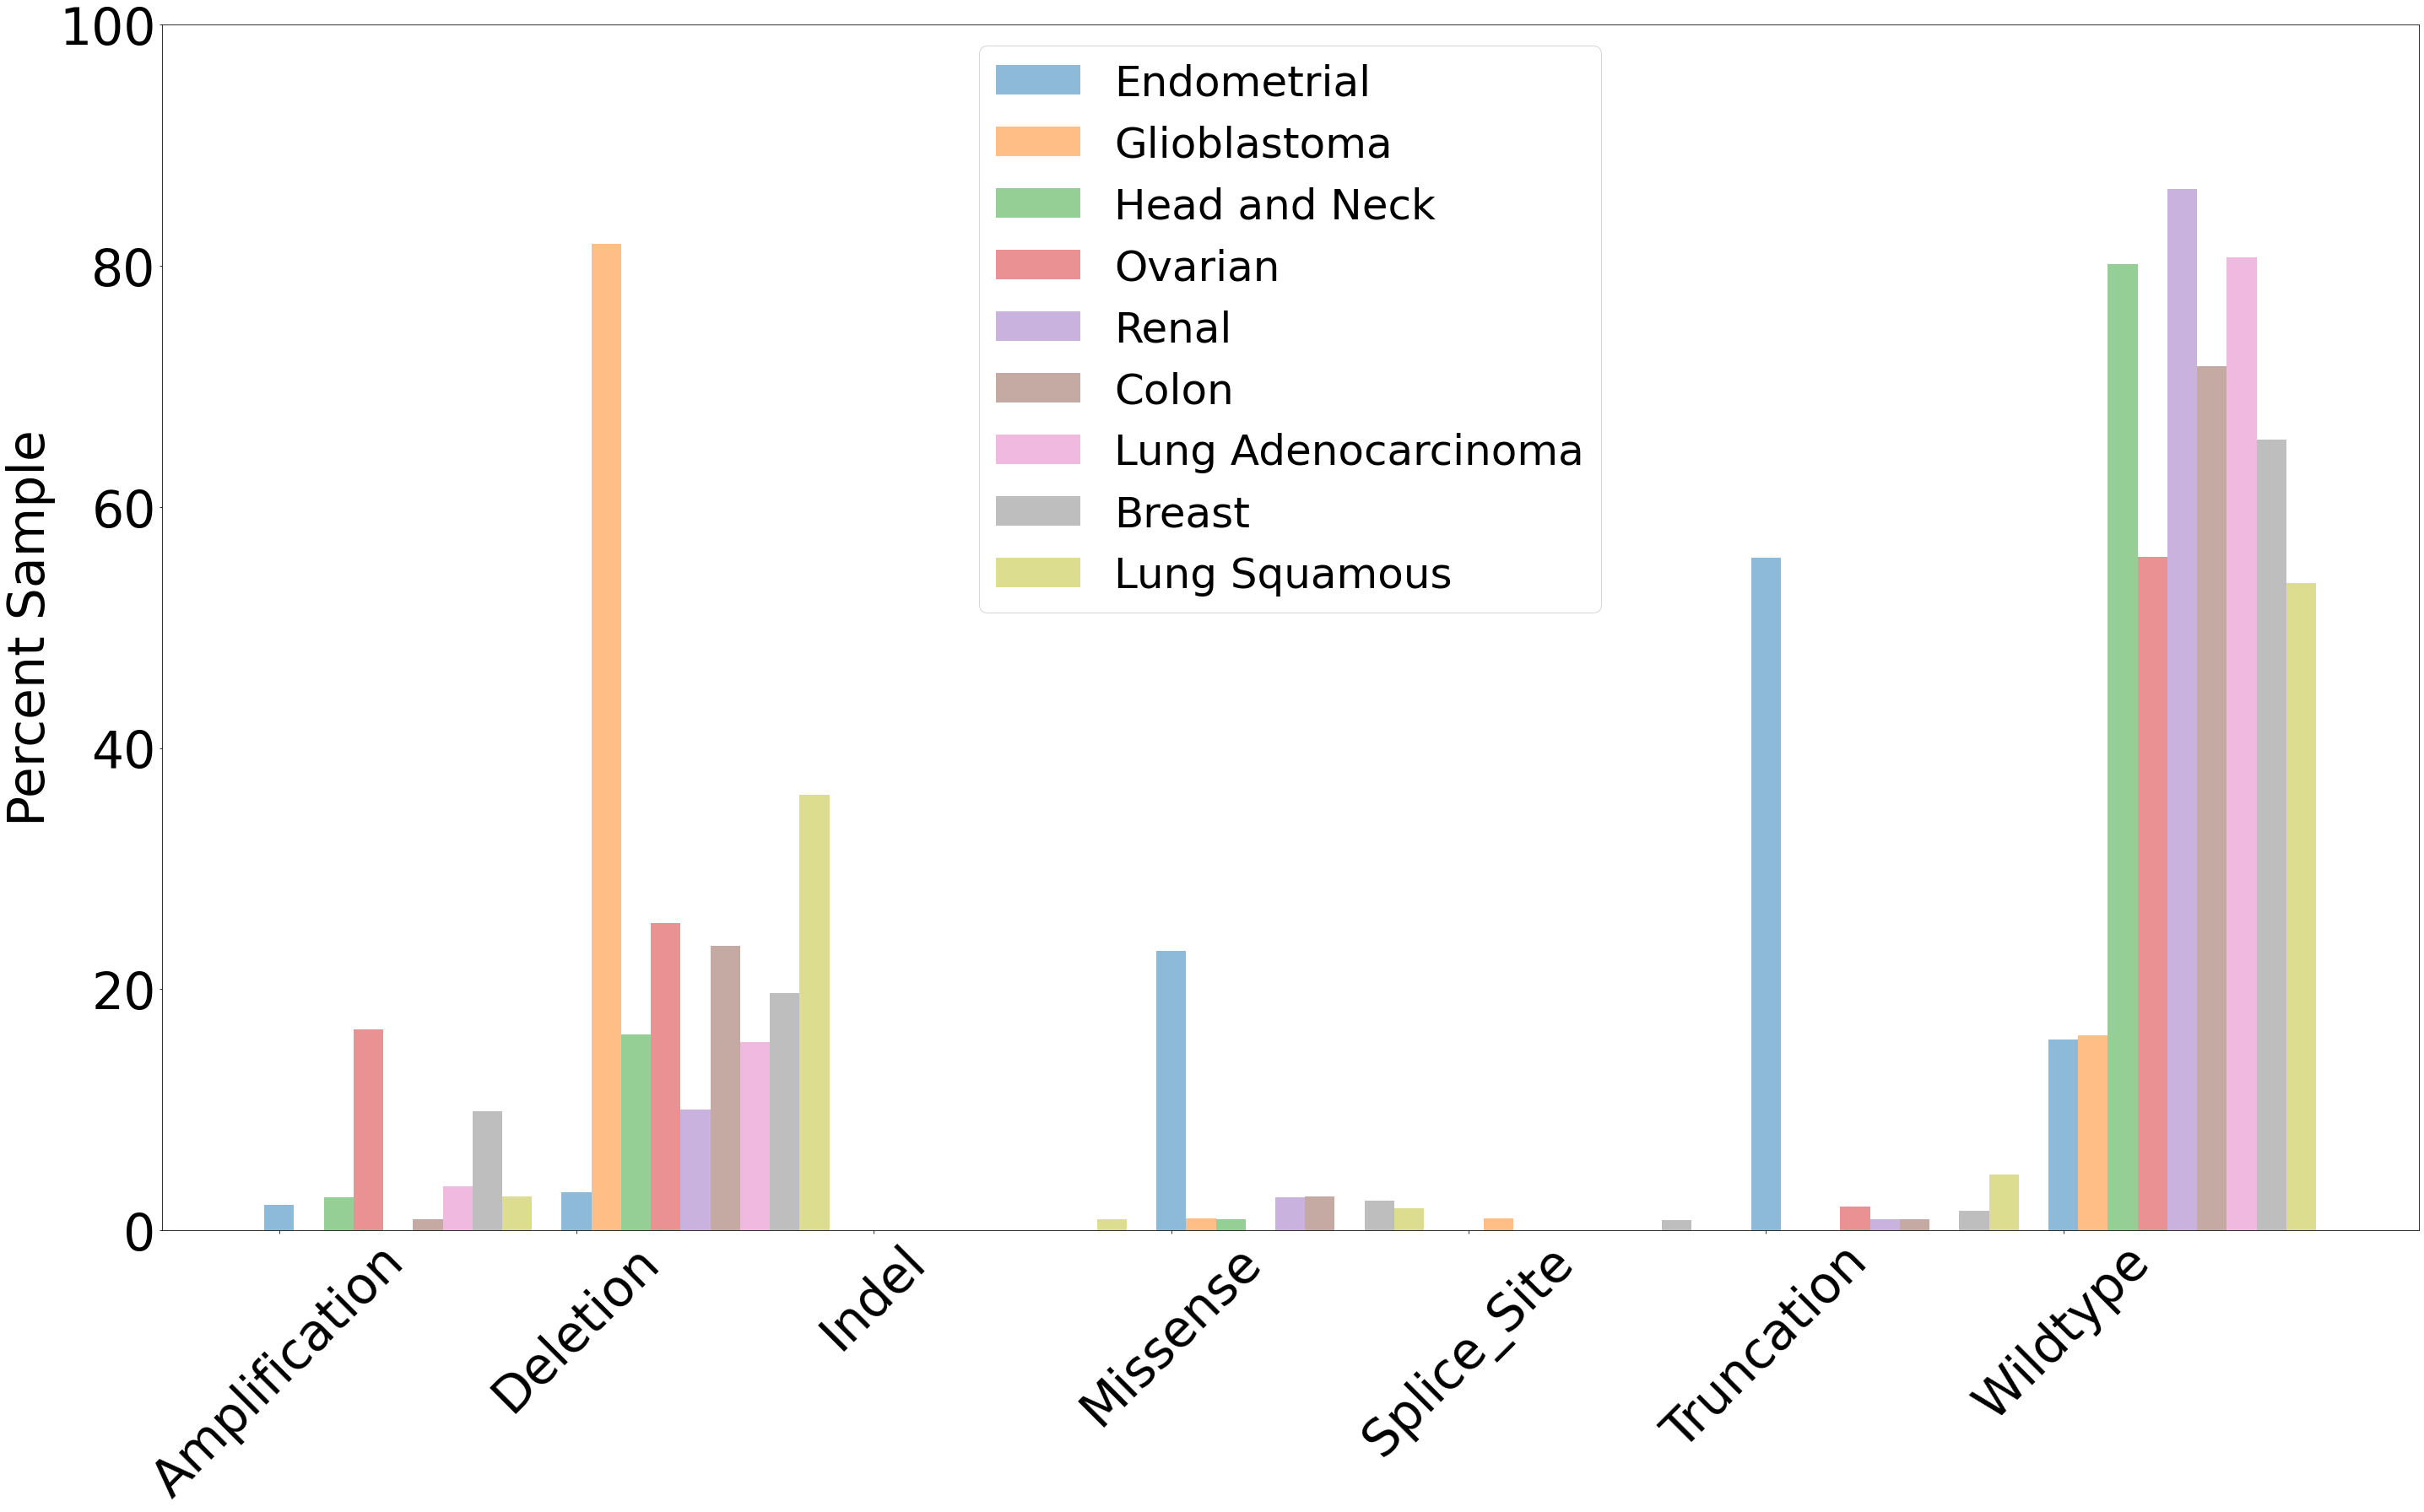

In [17]:
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Ovarian', 'Renal', 'Colon', 'Lung Adenocarcinoma', 'Breast',"Lung Squamous"]
p.figure1_plot_mutations(dfs, names,save_to_path = "Flagship_fig1.png")

# Step 4: Pancan EGFR mutation status

Repeat steps 1 - 3 using data from the pancan pipeline

load in pancan cptac data

In [10]:
pc_g = pc.PancanGbm()
pc_hn = pc.PancanHnscc()
pc_l = pc.PancanLuad()
pc_o = pc.PancanOv()
pc_c = pc.PancanCcrcc()
pc_col = pc.PancanCoad()
pc_b = pc.PancanBrca()
pc_ls = pc.PancanLscc()
pc_en = pc.PancanUcec()

Call get_geneotype_all_vars for EGFR for each cancer type. 

In [21]:
pc_endo = pc_en.get_genotype_all_vars(gene, "washu")
pc_gbm = pc_g.get_genotype_all_vars(gene, "washu")
pc_hnscc = pc_hn.get_genotype_all_vars(gene, "washu")
pc_ovar = pc_o.get_genotype_all_vars(gene, "washu")
pc_cc = pc_c.get_genotype_all_vars(gene, "washu")
pc_colon = pc_col.get_genotype_all_vars(gene, "washu")
pc_ld = pc_l.get_genotype_all_vars(gene, "washu")
pc_brca = pc_b.get_genotype_all_vars(gene, "washu")
pc_lscc = pc_ls.get_genotype_all_vars(gene, "washu")

In [22]:
#example 
pc_gbm

Name,Mutation,Location,Mutation_Status
Patient_ID,,,
C3L-00104,Deletion,Deletion,Multiple_mutation
C3L-00365,Deletion,Deletion,Single_mutation
C3L-00674,Deletion,Deletion,Multiple_mutation
C3L-00677,Deletion,Deletion,Multiple_mutation
C3L-01040,Deletion,Deletion,Single_mutation
...,...,...,...
C3N-03183,Deletion,Deletion,Multiple_mutation
C3N-03184,Deletion,Deletion,Single_mutation
C3N-03186,Deletion,Deletion,Single_mutation


# Step 5: Match Mutation Labels

Change labels to to match desired final figure.

In [32]:
pc_colon["Mutation"] = pc_colon['Mutation'].replace(['nonsynonymous SNV'], 'Missense')
pc_colon["Mutation"] = pc_colon['Mutation'].replace(['nonframeshift insertion'], 'In_Frame_Ins')
pc_colon["Mutation"] = pc_colon['Mutation'].replace(['frameshift deletion'], 'Frame_Shift_Del')

pc_colon.Mutation.value_counts()

Wildtype      86
Deletion      12
Truncation     5
Missense       3
Name: Mutation, dtype: int64

In [31]:
# Simplify mutation names, create truncation and indel groups
dfs = [pc_endo, pc_gbm, pc_hnscc, pc_cc, pc_ovar, pc_ld, pc_brca, pc_lscc, pc_colon]
for df in dfs:
    df['Mutation'].where(df['Mutation'] != 'Missense_Mutation', 'Missense', inplace = True) # replace when false
    df['Mutation'].where(df['Mutation'] != 'Wildtype_Tumor', 'Wildtype', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'In_Frame_Del', 'Indel', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'In_Frame_Ins', 'Indel', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'Nonsense_Mutation', 'Truncation', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'Frame_Shift_Del', 'Truncation', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'Frame_Shift_Ins', 'Truncation', inplace = True)

In [33]:
pc_ld["Mutation"] = pc_ld['Mutation'].replace(['No_Mutation'], 'Wildtype')
pc_colon["Mutation"] = pc_colon['Mutation'].replace(['No_Mutation'], 'Wildtype')

# Step 6: Create Figure 

Put dfs into a list. Create list of names for figure legend. 
Call plot_mutations function.

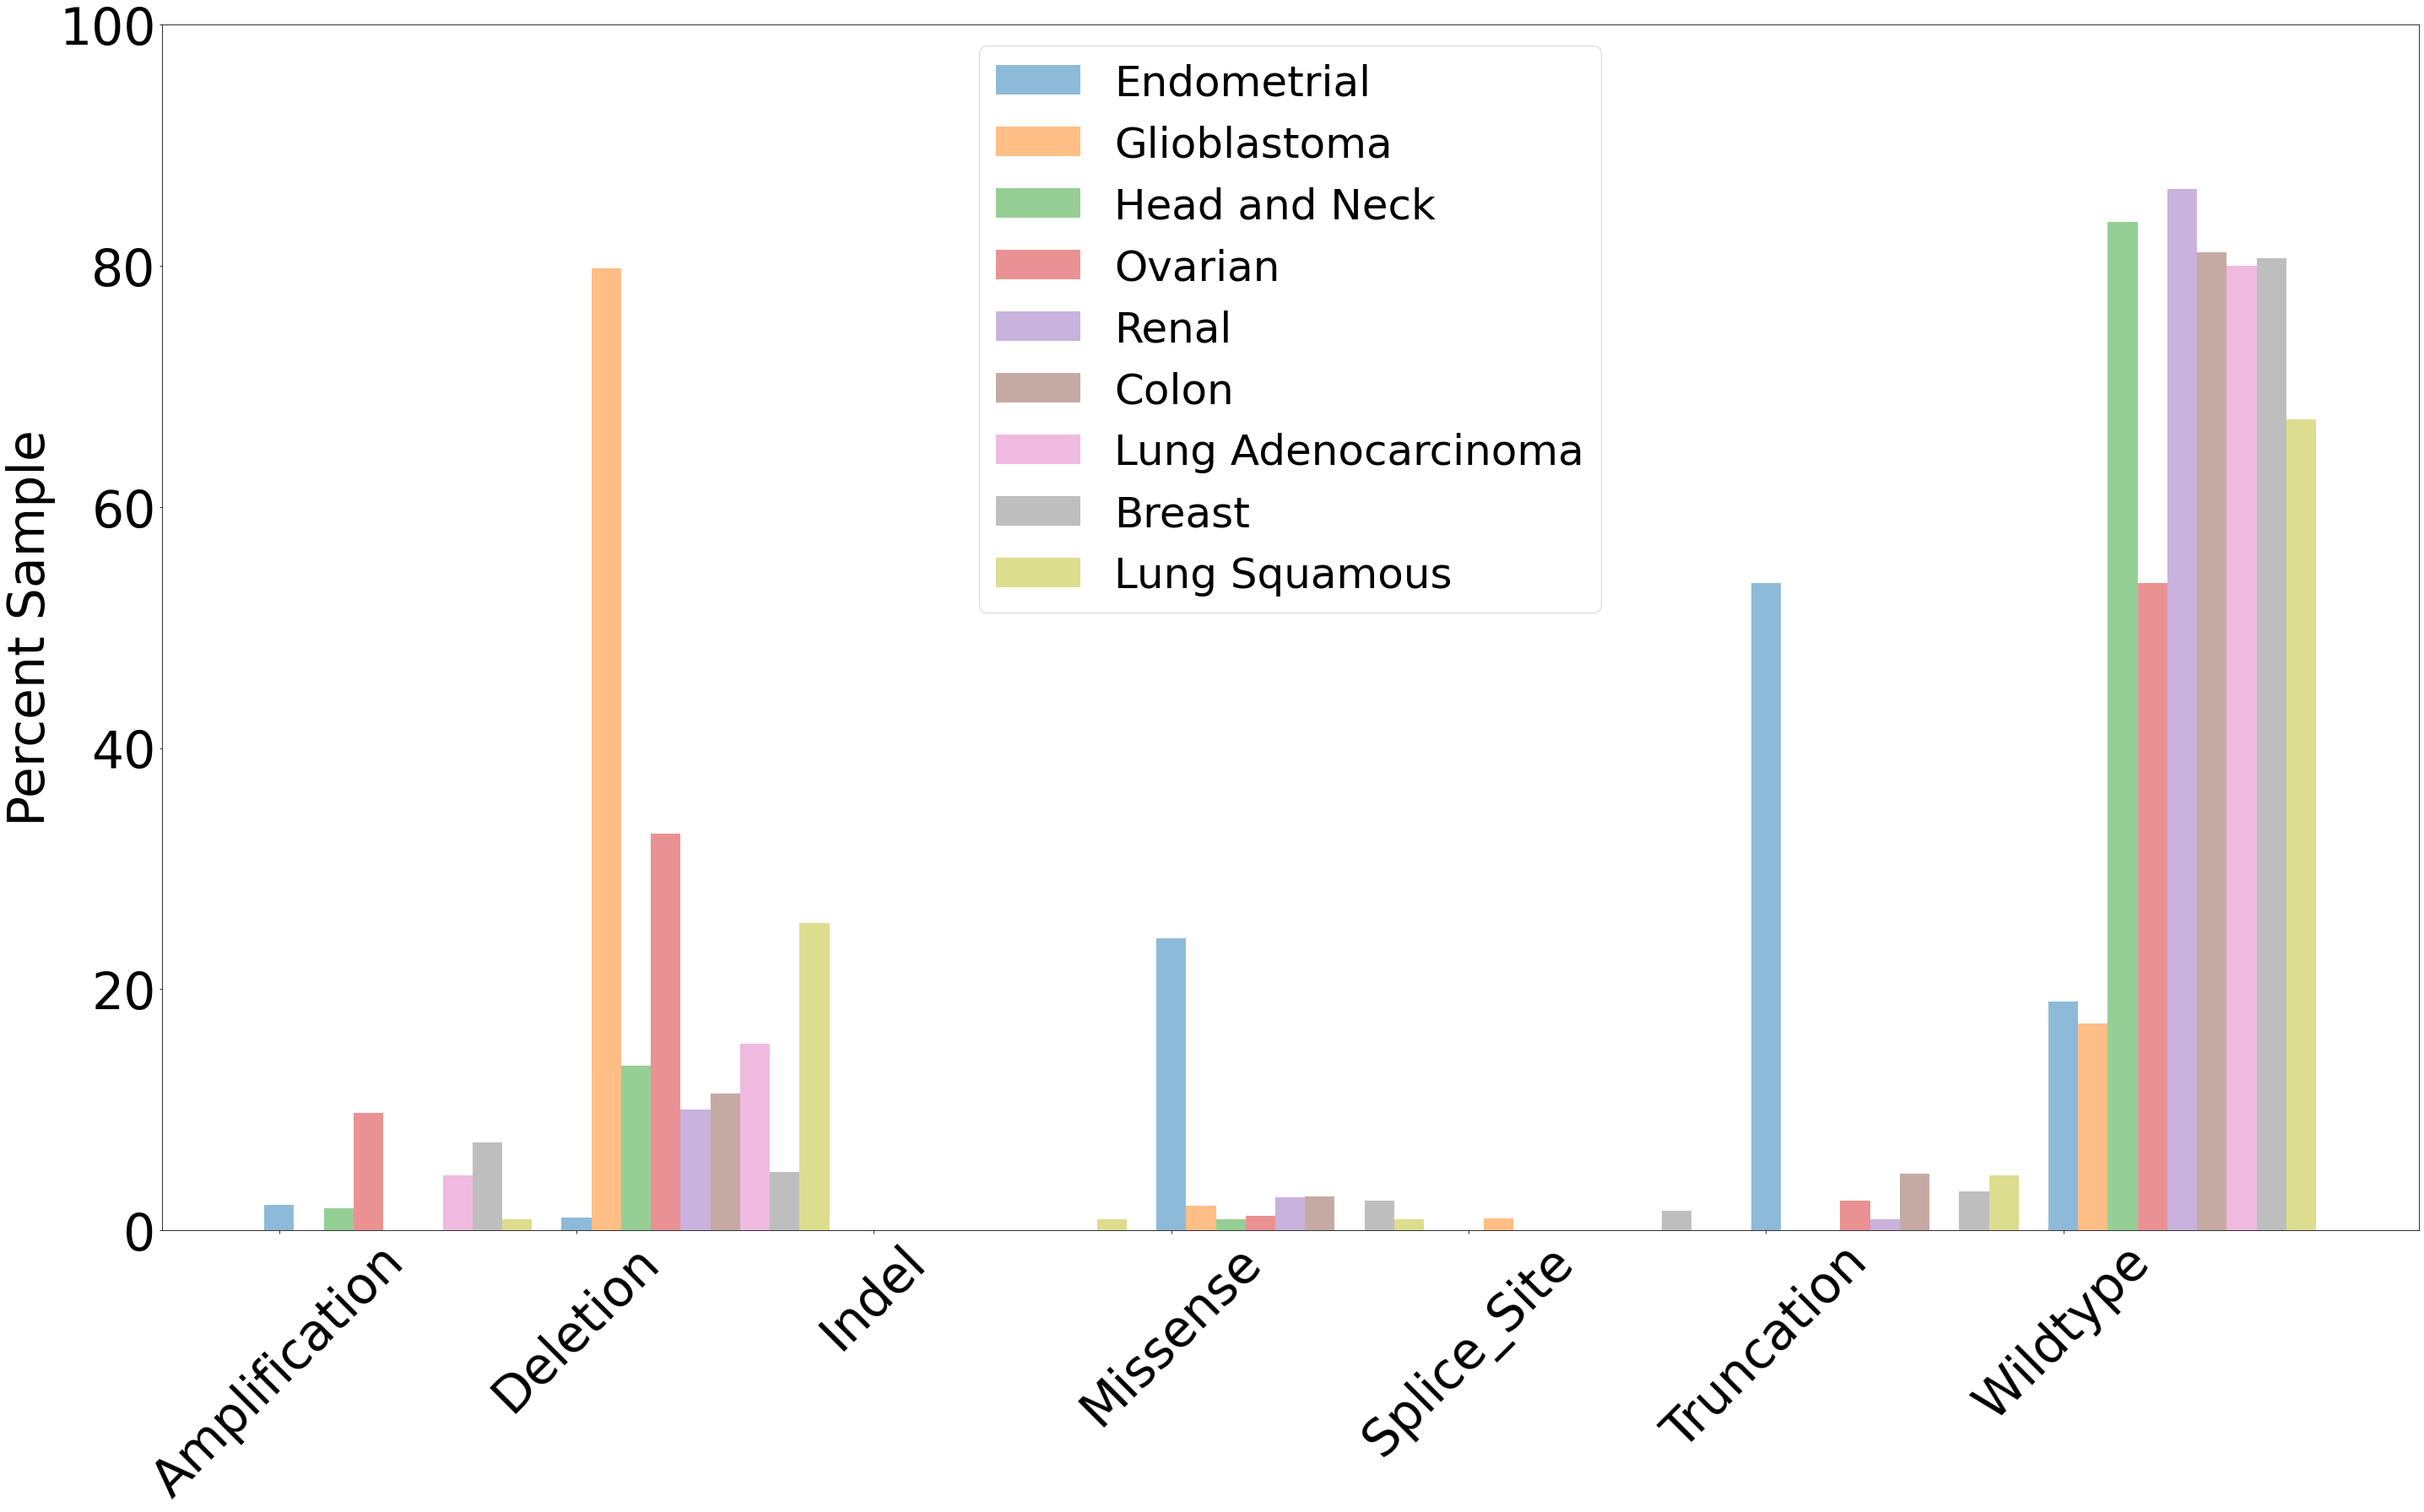

In [34]:
dfs = [pc_endo, pc_gbm, pc_hnscc, pc_ovar, pc_cc, pc_colon, pc_ld, pc_brca, pc_lscc]
names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Ovarian', 'Renal', 'Colon', 'Lung Adenocarcinoma', 'Breast',"Lung Squamous"]
p.figure1_plot_mutations(dfs, names, save_to_path = "harmonized_fig1.png")

# Compare percent of samples with PTEN deletions

In [43]:
#Calculate exact percent Flagship and pancan 
i = 0
dfs = [gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
pancan_dfs = [pc_gbm, pc_hnscc, pc_ovar, pc_cc, pc_colon, pc_ld, pc_brca, pc_lscc]
names = ['Glioblastoma', 'Head and Neck', 'Ovarian', 'Renal', 'Colon', 'Lung Adenocarcinoma', 'Breast',"Lung Squamous"]
for cancer_df in dfs:
    vc = cancer_df.Mutation.value_counts()
    pancan_vc = pancan_dfs[i].Mutation.value_counts()
    total = len(cancer)
    pancan_total = len(pancan_dfs[i])
    cnv_del = vc.Deletion
    pancan_cnv_del = pancan_vc.Deletion
    print(names[i])
    print("Flagship")
    print('total_samples:',total)
    print(cnv_del,'/',total,'=', cnv_del/total,'\n')
    print("Pancan")
    print('total_samples:',pancan_total)
    print(pancan_cnv_del,'/',pancan_total,'=', pancan_cnv_del/pancan_total,'\n\n\n')
    i += 1
   

Glioblastoma
Flagship
total_samples: 108
81 / 108 = 0.75 

Pancan
total_samples: 99
79 / 99 = 0.797979797979798 



Head and Neck
Flagship
total_samples: 108
18 / 108 = 0.16666666666666666 

Pancan
total_samples: 110
15 / 110 = 0.13636363636363635 



Ovarian
Flagship
total_samples: 108
26 / 108 = 0.24074074074074073 

Pancan
total_samples: 82
27 / 82 = 0.32926829268292684 



Renal
Flagship
total_samples: 108
11 / 108 = 0.10185185185185185 

Pancan
total_samples: 110
11 / 110 = 0.1 



Colon
Flagship
total_samples: 108
25 / 108 = 0.23148148148148148 

Pancan
total_samples: 106
12 / 106 = 0.11320754716981132 



Lung Adenocarcinoma
Flagship
total_samples: 108
17 / 108 = 0.1574074074074074 

Pancan
total_samples: 110
17 / 110 = 0.15454545454545454 



Breast
Flagship
total_samples: 108
24 / 108 = 0.2222222222222222 

Pancan
total_samples: 124
6 / 124 = 0.04838709677419355 



Lung Squamous
Flagship
total_samples: 108
39 / 108 = 0.3611111111111111 

Pancan
total_samples: 110
28 / 110 = 0

# Compare Percent of samples with Amplification mutations

In [ ]:
#Calculate exact percent Pancan
i = 0
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Ovarian', 'Renal', 'Colon', 'Lung Adenocarcinoma', 'Breast',"Lung Squamous"]
for cancer in dfs:
    vc = cancer.Mutation.value_counts()
    total = len(cancer)
    cnv_amp = vc.Amplification
    print(names[i])
    print('total_samples:',total,'\n')
    print(cnv_amp,'/',total,'=', cnv_amp/total,'\n')
    i += 1